In [1]:
!pip install statsmodels

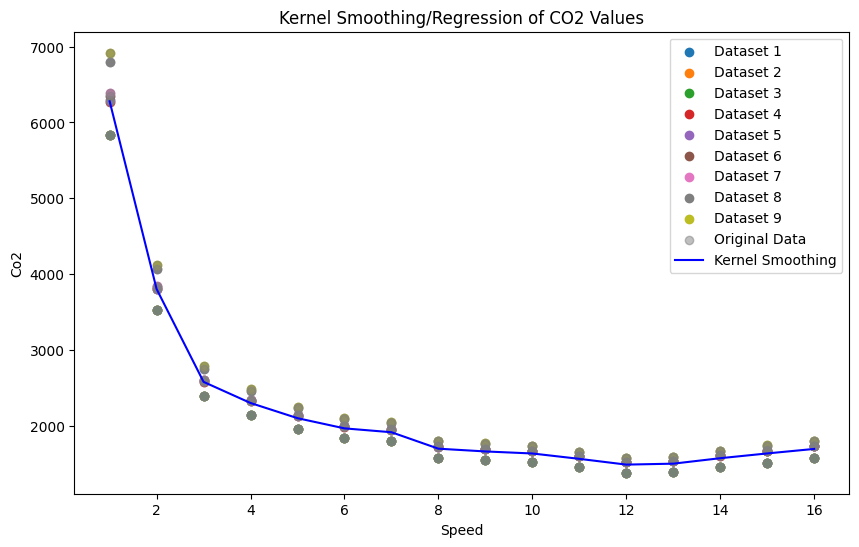

 Speed  Predicted Co2 (Kernel Smoothing)
     1                       6278.944566
     2                       3802.945033
     3                       2578.061002
     4                       2299.539251
     5                       2099.331110
     6                       1964.907310
     7                       1913.958855
     8                       1696.934854
     9                       1660.610789
    10                       1633.756412
    11                       1562.966788
    12                       1486.962563
    13                       1499.441346
    14                       1571.544489
    15                       1634.411473
    16                       1693.787935


In [29]:
#Working well

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.kernel_regression import KernelReg

# Assuming you have the list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files, assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Ensure data is sorted for kernel regression
sorted_indices = np.argsort(all_speed.flatten())
sorted_speed = all_speed.flatten()[sorted_indices]
sorted_rates = all_rates[sorted_indices]

# Perform Kernel Regression using Nadaraya-Watson kernel regression
kr = KernelReg(endog=sorted_rates, exog=sorted_speed, var_type='c', ckertype='gaussian', bw='cv_ls')
smoothed_values, _ = kr.fit(sorted_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.scatter(all_speed, all_rates, color='gray', alpha=0.5, label='Original Data')
plt.plot(sorted_speed, smoothed_values, color='blue', label='Kernel Smoothing')
plt.title('Kernel Smoothing/Regression of CO2 Values')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for unique speeds using the model
unique_speeds = np.array([i for i in range(1, num_speed_points + 1)])
predicted_co2_values_for_unique_speeds, _ = kr.fit(unique_speeds)

# Create a DataFrame with the predictions for unique speeds
predicted_df = pd.DataFrame({
    'Speed': unique_speeds,
    'Predicted Co2 (Kernel Smoothing)': predicted_co2_values_for_unique_speeds
})

# Print the DataFrame without index and with proper alignment
print(predicted_df.to_string(index=False))
